In [2]:
import numpy as np

from parse_AiThinker_data import read_file_data, get_array_from_df, calc_results

In [75]:
def triangulate(l_1: float, l_2: float, L: float, in_degrees=True):
    """
    Summary:
    Calculates the length of median (distance between baseline midpoint and the anchor position (point C)) and the angle between median and baseline.

    :param l_1: distance from first tag (measured value) point A
    :param l_2: distance from second tag (measured value) point B
    :param L: dist_btw_tags, a - half of the distance
    :param in_degrees: boolean, as default - True
    :return: angle, dist
    """
    #The angle the function work with:
    #            C
    #           ^
    #          /|\
    #      l_1/ | \l_2
    #        /  |d \
    #      A/___|)__\B
    # l_tag     L     r_tag

    ls = [l_1, l_2]
    if np.abs((l_2 - l_1)) > L:
        biggest = ls.index(max(ls))
        if biggest == 0:
            l_1 = l_2 + L
        else:
            l_2 = l_1 + L

    cos_B = (L ** 2 + l_2 ** 2 - l_1 ** 2) / (2 * L * l_2)

    print(f"cos A: {cos_B}")

    # if np.abs(cos_A) > 1:
    #     cos_A = np.sign(cos_A) * np.nextafter(1, 0)
    # midpoint btw tags
    a = L / 2
    d = np.sqrt(a ** 2 + l_2 ** 2 - 2 * a * l_2 * cos_B)
    cos_alpha = (d ** 2 + a ** 2 - l_2 ** 2) / (2 * d * a)
    print(f"cos alpha: {cos_alpha}")

    # if np.abs(cos_alpha) > 1:
    #     cos_alpha = np.sign(cos_alpha) * np.nextafter(1, 0)

    alpha = np.arccos(cos_alpha)
    if in_degrees:
        alpha = alpha * 180 / np.pi

    return d, alpha


In [31]:
import os

# Get the list of all files and directories
path = "2_tags_1_anchor_measurements"
dir_list = os.listdir(path)
dictionary = {}
for file_name in dir_list:
    file_name = path + '/' + file_name
    df_of_results = read_file_data(file_name, min_num_of_measurements=40)
    # print(df_of_results)
    results = get_array_from_df(df_of_results)
    dictionary = calc_results(file_name, results, dictionary=dictionary)

Exp info:
	Andle	Distance btw tags (cm)
	45 deg 	60 
	Results for 0.8485281374238569 m:
	Tag 1
		True dist:			1.0816653826391966 m
		Estimated dist:	1.1862121212121213 m 
		Standard deviation:	16.90236235193817 cm
		RMSE of measurement:	0.19874356808172963 m
	Tag 2
		True dist:			0.6708203932499367 m
		Estimated dist:	0.9465151515151515 m 
		Standard deviation:	14.531566918204494 cm
		RMSE of measurement:	0.31164762704814675 m
	Results for 1.2727922061357853 m:
	Tag 1
		True dist:			1.4999999999999998 m
		Estimated dist:	2.1487234042553194 m 
		Standard deviation:	12.613091849811052 cm
		RMSE of measurement:	0.6608714427404074 m
	Tag 2
		True dist:			1.0816653826391966 m
		Estimated dist:	1.7991489361702129 m 
		Standard deviation:	9.043229011040774 cm
		RMSE of measurement:	0.7231601818975567 m
	Results for 1.6970562748477138 m:
	Tag 1
		True dist:			1.9209372712298542 m
		Estimated dist:	3.1739999999999995 m 
		Standard deviation:	26.089078174592522 cm
		RMSE of measurement:	1.279933

In [43]:
max_err = max([tags_info["RMSE"] for dist, value in dictionary.items()
               for anchor_dist, value1 in value.items()
               for angle, value2 in value1.items()
               for tag, tags_info in value2.items()])

max_dist = max([tags_info["Truth_dist"] for dist, value in dictionary.items()
                for anchor_dist, value1 in value.items()
                for angle, value2 in value1.items()
                for tag, tags_info in value2.items()])

n_points = len([value1 for dist, value in dictionary.items()
                for anchor_dist, value1 in value.items()])

cos A: -0.1331271737706828
cos alpha: 0.413482973359033
cos A: -0.4724805123895412
cos alpha: 0.5871203034150767
cos A: -0.959085068105884
cos alpha: 0.9670097024085542
cos A: 0.8912006976864848
cos alpha: -0.876098298885493
cos A: 0.30458498057983047
cos alpha: -0.2511409778858385
cos A: 0.7556018614400806
cos alpha: -0.6205645233139745
cos A: 0.49350164894333093
cos alpha: -0.3743197430589893
cos A: -1.0000000000000007
cos alpha: 1.0000000000000002
cos A: -0.9999999999999999
cos alpha: 0.9999999999999993
cos A: 0.03681938096830353
cos alpha: 0.01335011416117816
cos A: 0.4153335465192548
cos alpha: -0.23667113988666216
cos A: 0.24014816821922774
cos alpha: -0.100443905693537
cos A: -0.0305965462789286
cos alpha: 0.1419444159482492
cos A: -1.0000000000000002
cos alpha: 1.0000000000000009
cos A: 0.7603413460440518
cos alpha: -0.7297219087964404
cos A: 0.145383370443675
cos alpha: -0.08972569329763544
cos A: -0.23152371748409556
cos alpha: 0.27997123255968837


/tmp/ipykernel_8185/1828126244.py:44: RuntimeWarning: invalid value encountered in arccos
  alpha = np.arccos(cos_alpha)


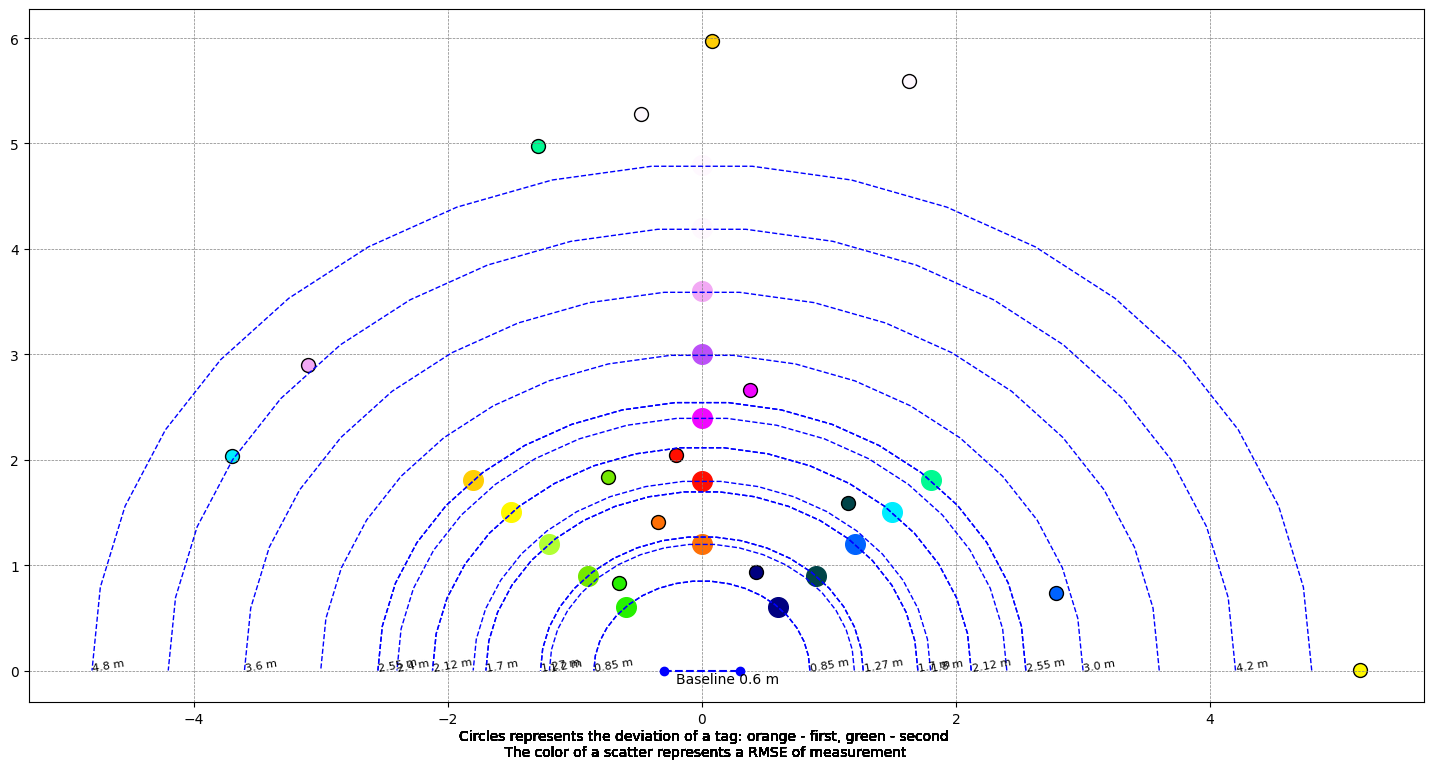

cos A: 0.7085256455721641
cos alpha: -0.6348214815667363
cos A: 0.9455512654033704
cos alpha: -0.9373560281664924
cos A: 0.19243252897388438
cos alpha: -0.1460897034123658
cos A: 0.2983019655341301
cos alpha: -0.2773400137849807
cos A: 1.0
cos alpha: -1.000000000000001
cos A: -0.5167386714308921
cos alpha: 0.6165795933702825
cos A: -0.659305920476441
cos alpha: 0.7034148688722837
cos A: -0.7859937823366444
cos alpha: 0.8060810912478089
cos A: -0.951590521160773
cos alpha: 0.955353436310786
cos A: -0.9999999999999992
cos alpha: 0.9999999999999981
cos A: 0.6549090070393152
cos alpha: -0.6020474949265862
cos A: 0.16545614862316052
cos alpha: -0.1115310149743563
cos A: -0.9999999999999996
cos alpha: 1.0000000000000016
cos A: -0.17283620512682038
cos alpha: 0.20150322604836454


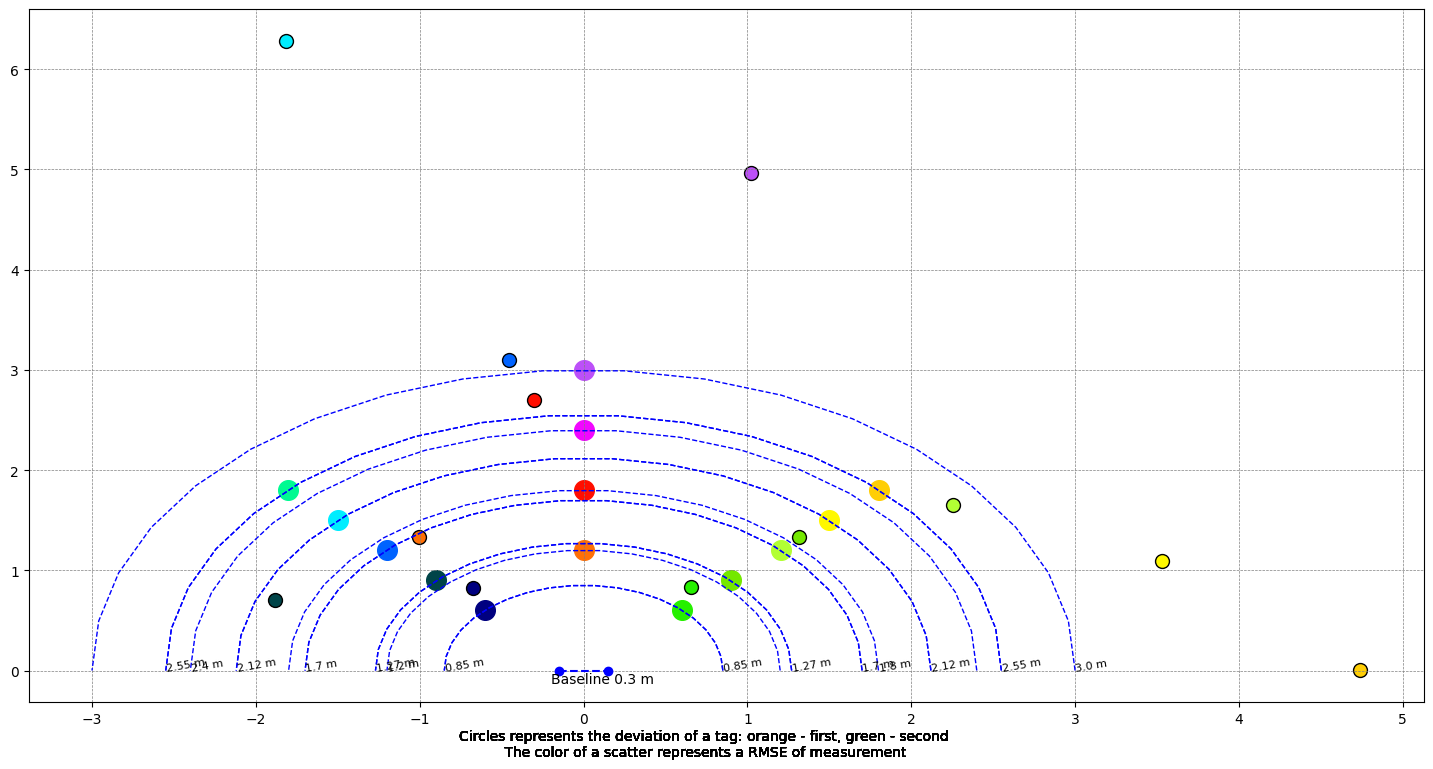

In [77]:
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

mid_baseline_xy = [0, 0]
for dist, value in dictionary.items():
    fig, ax = plt.subplots(figsize=(18, 9))
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    left_tag = [mid_baseline_xy[0] - dist / 2, mid_baseline_xy[1]]
    right_tag = [mid_baseline_xy[0] + dist / 2, mid_baseline_xy[1]]
    # plt.plot(mid_baseline_xy[0], mid_baseline_xy[1], marker="o", markersize=20, markeredgecolor="red",
    #          markerfacecolor="green")
    # plt.plot(left_tag[0], left_tag[1], marker="o", markersize=10, markeredgecolor="blue")
    # plt.plot(right_tag[0], right_tag[1], marker="o", markersize=10, markeredgecolor="blue")
    # draw baseline
    plt.plot([left_tag[0], right_tag[0]], [left_tag[1], right_tag[1]], 'bo', linestyle="--")
    plt.gca().annotate(f'Baseline {dist} m', xy=(0 - 0.2, 0 - 0.12), xycoords='data', fontsize=10)

    # plt.text(left_tag[0] - 0.5, left_tag[1] + 0.25, "left_tag")
    # plt.text(right_tag[0], right_tag[1] + 0.25, "right_tag")

    i = 0
    j = 0
    scatters = []
    colors = cm.gist_ncar(np.linspace(0, 2, n_points))
    # colors = cm.rainbow(np.linspace(0, 1, n_points))
    circle_colors = ["orange", "green"]
    for anchor_dist, value1 in value.items():

        r = round(float(anchor_dist.split(" ")[1]), 2)
        #draw arc
        arc_angles = np.linspace(0 * np.pi, np.pi, 20)
        arc_xs = r * np.cos(arc_angles)
        arc_ys = r * np.sin(arc_angles)
        plt.plot(arc_xs, arc_ys, linestyle="--", color='blue', lw=1)
        xy = (arc_xs[0], arc_ys[0])
        if i % 2 == 0:
            xy = (arc_xs[-1], arc_ys[0])
        plt.gca().annotate(f'{r} m', xy=xy, xycoords='data', fontsize=8, rotation=10)
        i += 1

        for angle, value2 in value1.items():

            anchor_pose_x = r * np.cos(angle)
            anchor_pose_y = r * np.sin(angle)
            ls = []
            for tag, tags_info in value2.items():
                tag_n = int(tag.split(' ')[1])
                dr = tags_info["STD"]
                rmse = tags_info["RMSE"]
                est = tags_info["Estimated_val"]
                angles = np.linspace(0 * np.pi, 2 * np.pi, 100)
                ls.append(est)
            d, angle_btw_median_base = triangulate(l_1=ls[0], l_2=ls[1], L=dist, in_degrees=False)
            est_anchor_pose_x = d * np.cos(angle_btw_median_base)
            est_anchor_pose_y = d * np.sin(angle_btw_median_base)

            # d, cos_alpha = triangulate(l_1=ls[0], l_2=ls[1], L=dist, in_degrees=False)
            # sin_alpha = np.sqrt(1 - cos_alpha**2)
            # est_anchor_pose_x = d * cos_alpha
            # est_anchor_pose_y = d * sin_alpha

            # tag_pos = (anchor_pose_x + anchor_pose_x*0.05*(-1)**(tag_n%2), anchor_pose_y)

            # Show std of a tag
            # xs = anchor_pose_x + dr * np.cos(angles)
            # ys = anchor_pose_y + dr * np.sin(angles)
            # plt.plot(xs, ys, color=colors[tag_n])

            plt.scatter(anchor_pose_x, anchor_pose_y, color=colors[j], s=200)
            plt.scatter(est_anchor_pose_x, est_anchor_pose_y, color=colors[j], s=100, edgecolors='black')
            j += 1

            # Show the results for each tag
            # est_x = est * np.cos(angle)
            # est_y = est * np.sin(angle)
            # plt.scatter(est_x, est_y, c=colors[tag_n])
            # plt.gca().annotate(f'tag_{tag_n+1}', xy=(est_x, est_y), xycoords='data', fontsize=8, rotation=10)

        txt = f"Circles represents the deviation of a tag: {circle_colors[0]} - first, {circle_colors[1]} - second\n The color of a scatter represents a RMSE of measurement"
        fig.text(.5, .05, txt, ha='center')
    # cbar = plt.colorbar()
    # cbar.ax.set_xlabel('RMSE m', fontsize=20)

    # plt.xlim(-max_dist, max_dist)
    # plt.ylim(-0.5, max_dist)
    plt.show()